In [72]:
%matplotlib inline
%cd /home/wallar/projects/nyc-taxi-analysis/

/home/wallar/projects/nyc-taxi-analysis


In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
def load_data(p_st, d_st):
    fname = "data/ts/{}-{}.txt".format(p_st, d_st)
    df_options = {"names": ["datetime"],
                  "parse_dates": ["datetime"],
                  "infer_datetime_format": True,
                  "header": None,
                  "squeeze": True,
                  "skip_blank_lines": True,
                  "index_col": 0}
    df = pd.read_csv(fname, **df_options)
    df.sort_index(inplace=True)
    #df.sort_values(0, inplace=True)
    return df

def query_time(df, start, end):
    qstr = "'{}' <= datetime < '{}'".format(start, end)
    return df.query(qstr)

In [341]:
import tqdm
from itertools import product

p, d = 0, 0
max_size = 0
N = 100
total = 0
for i, j in tqdm.tqdm_notebook(product(xrange(42), xrange(100)), total=42 * 100):
    try:
        df = load_data(i, j)
        total += df.shape[0]
        if df.shape[0] > max_size:
            p, d = i, j
            max_size = df.shape[0]
    except IOError:
        pass

36 36 431496 97917438


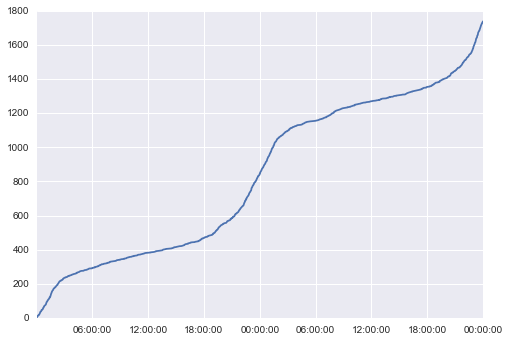

In [347]:
print p, d, max_size, total
df = load_data(p, d)
df = df["2014-08-05 00:00":"2014-08-07 00:00"]
plt.plot(df.index, range(df.shape[0]))